In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [7]:
x = 0.1
y = 0.1
z = 0.1

dt = 0.001
num_steps = 100000

xlist = []
ylist = []
zlist = []

for i in range(num_steps):
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)
    x_dot, y_dot, z_dot = lorenz(x, y, z)
    x += x_dot * dt
    y += y_dot * dt
    z += z_dot * dt

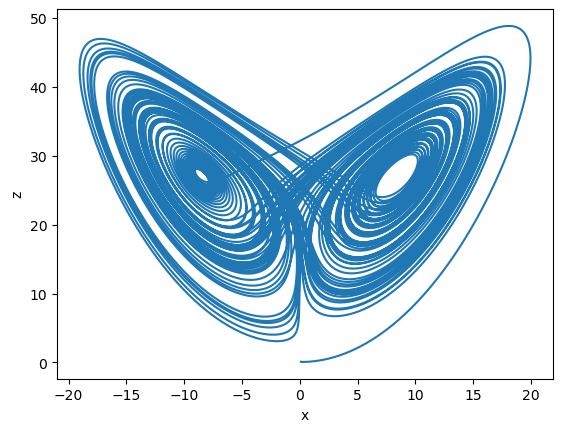

In [9]:
plt.plot(xlist, zlist)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

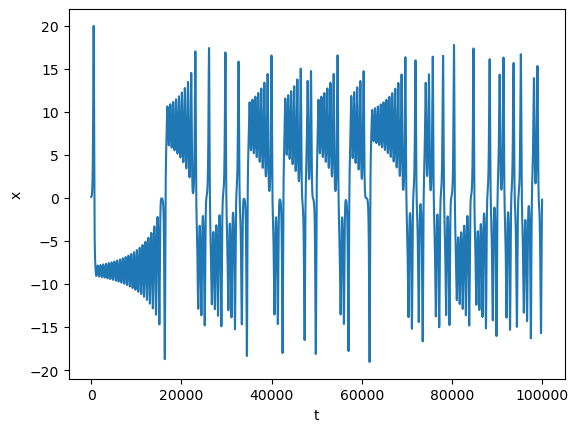

In [10]:
plt.plot(xlist)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

In [33]:
def get_time_delayed_embedding(time_series, delay, dimension):
    delayed_data = []
    for i in range(dimension):
        delayed_data.append(time_series[i*delay:])

    for i in range(dimension):
        delayed_data[i] = delayed_data[i][:len(delayed_data[dimension-1])]
    return delayed_data


In [31]:
delay = 200
dimension = 2
x = get_time_delayed_embedding(xlist, delay, dimension)

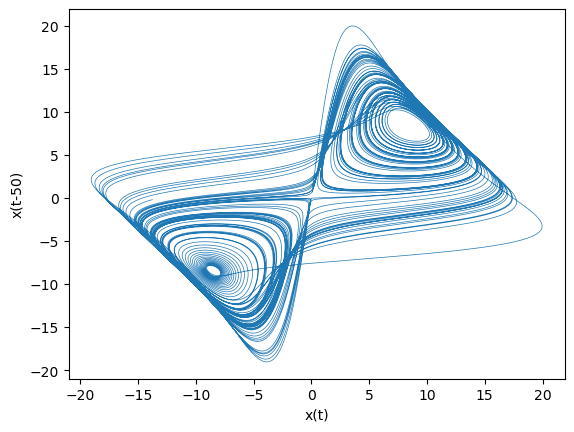

In [32]:
plt.plot(x[0], x[1], lw=0.5)
plt.xlabel('x(t)')
plt.ylabel('x(t-50)')
plt.show()

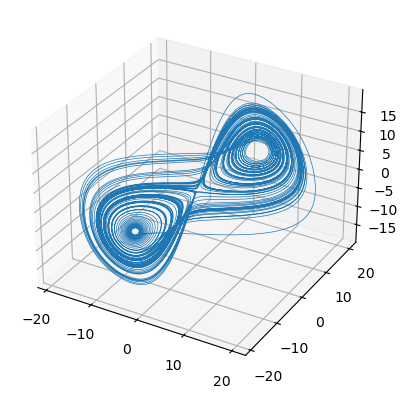

In [25]:
# 3d plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, x2, x3, lw=0.5)
plt.show()